# Import necessary libraries

In [ ]:
# This code is adapted from
# https://dashee87.github.io/football/python/predicting-football-results-with-statistical-modelling/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson, skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Get the data

In [ ]:
# We'll be using data from a website football-data.co.uk
# Specifically we'll use data from the current Italian Serie A championship

# HomeTeam is the name of a home team
# AwayTeam is the name of an away team
# FTHG is a number of goals scored by home team
# FTAG is a number of goals scored by away team

df = pd.read_csv("https://www.football-data.co.uk/mmz4281/2324/I1.csv")
df = df[['HomeTeam','AwayTeam','FTHG','FTAG']]
df = df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
df.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Empoli,Verona,0,1
1,Frosinone,Napoli,1,3
2,Genoa,Fiorentina,1,4
3,Inter,Monza,2,0
4,Roma,Salernitana,2,2


# Building a model

In [ ]:
# We'll build a simple and straightforward model
# It'll use teams matches both home and away, as well as goals scored by the team
# We'll run every match twice for each team to get observation for each team as a home team and as an away team
# Because these matches are different

goal_model_data = pd.concat([df[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           df[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

In [ ]:
goal_model_data.head()

,team,opponent,goals,home
0,Empoli,Verona,0,1
1,Frosinone,Napoli,1,1
2,Genoa,Fiorentina,1,1
3,Inter,Monza,2,1
4,Roma,Salernitana,2,1


In [ ]:
goal_model_data.loc[(goal_model_data['team'] == 'Inter')].sort_index(ascending=True)

,team,opponent,goals,home
3,Inter,Monza,2,1
19,Inter,Cagliari,2,0
26,Inter,Fiorentina,4,1
31,Inter,Milan,5,1
45,Inter,Empoli,1,0
54,Inter,Sassuolo,1,1
62,Inter,Salernitana,4,0
72,Inter,Bologna,2,1
81,Inter,Torino,3,0
96,Inter,Roma,1,1


In [ ]:
goal_model_data.loc[(goal_model_data['opponent'] == 'Inter')].sort_index(ascending=True)


,team,opponent,goals,home
3,Monza,Inter,0,0
19,Cagliari,Inter,0,1
26,Fiorentina,Inter,0,0
31,Milan,Inter,1,0
45,Empoli,Inter,0,1
54,Sassuolo,Inter,2,0
62,Salernitana,Inter,0,1
72,Bologna,Inter,2,0
81,Torino,Inter,0,1
96,Roma,Inter,0,0


# Running our model

In [ ]:
#Fit the model to the data
#Home advantage included
#Team and opponent as fixed effects.
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  200
Model:                            GLM   Df Residuals:                      160
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -258.43
Date:                Thu, 02 Nov 2023   Deviance:                       185.78
Time:                        11:08:08   Pearson chi2:                     167.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0312      0.448      0.070      0.945      -0.848       0.910
team[T.Bologna]            -0.4927      0.390     -1.262      0.207      -1.258       0.272
team[T.Cagliari]           -0.6888      0.426     -1.616      0.106      -1.524       0.147
team[T.Empoli]             -1.7120      0.636     -2.693      0.007      -2.958      -0.466
team[T.Fiorentina]         -0.0277      0.344     -0.081      0.936      -0.702       0.647
team[T.Frosinone]          -0.2564      0.364     -0.704      0.481      -0.970       0.457
team[T.Genoa]              -0.5404      0.403     -1.339      0.180      -1.331       0.250
team[T.Inter]               0.2227      0.322      0.691      0.490      -0.409       0.855
team[T.Juventus]           -0.0257      0.360     -0.071      0.943      -0.731       0.680
team[T.Lazio]              -0.1801      0.377     -0.478      0.633      -0.919       0.558
team[T.Lecce]              -0.6423      0.408     -1.575      0.115      -1.441       0.157
team[T.Milan]               0.1795      0.347      0.518      0.605      -0.500       0.859
team[T.Monza]              -0.7524      0.426     -1.767      0.077      -1.587       0.082
team[T.Napoli]              0.2320      0.331      0.701      0.483      -0.416       0.880
team[T.Roma]                0.0103      0.336      0.031      0.976      -0.648       0.668
team[T.Salernitana]        -1.1742      0.479     -2.449      0.014      -2.114      -0.235
team[T.Sassuolo]           -0.0727      0.379     -0.192      0.848      -0.815       0.670
team[T.Torino]             -0.9355      0.456     -2.052      0.040      -1.829      -0.042
team[T.Udinese]            -1.2130      0.476     -2.547      0.011      -2.146      -0.280
team[T.Verona]             -1.0135      0.483     -2.100      0.036      -1.960      -0.067
opponent[T.Bologna]        -0.1547      0.507     -0.305      0.760      -1.149       0.840
opponent[T.Cagliari]        0.8432      0.433      1.948      0.051      -0.005       1.691
opponent[T.Empoli]          0.8162      0.436      1.872      0.061      -0.038       1.671
opponent[T.Fiorentina]      0.4504      0.456      0.989      0.323      -0.442       1.343
opponent[T.Frosinone]       0.7172      0.443      1.618      0.106      -0.151       1.586
opponent[T.Genoa]           0.4468      0.459      0.974      0.330      -0.453       1.346
opponent[T.Inter]          -0.3641      0.582     -0.625      0.532      -1.506       0.778
opponent[T.Juventus]       -0.2369      0.552     -0.430      0.668      -1.318       0.844
opponent[T.Lazio]           0.1799      0.466      0.386      0.699      -0.734       1.093
opponent[T.Lecce]           0.3985      0.463      0.860      0.390      -0.510       1.307
opponent[T.Milan]           0.1383      0.476  

# Finding expected mean number of goals

In [ ]:
home_team='Bologna'
away_team='Lazio'

In [ ]:
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

Bologna against Lazio expect to score: 1    0.972102
dtype: float64
Lazio against Bologna expect to score: 1    0.738114
dtype: float64


# Match simulation

In [ ]:
#Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):

    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]

# This code uses two for loops to calculate the Poisson probability mass function for each team's average goals
# and stores the results in the team_pred list.

# team_pred = []

# for team_avg in [home_goals_avg, away_goals_avg]:
#     pred = []
#     for i in range(0, max_goals+1):
#         pred.append(stats.poisson.pmf(i, team_avg))
#     team_pred.append(pred)
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

# team_pred returns the probability distribution of goals from 0 to max_goals value
# To get the probability of a score, we need to multiply probability of each home team result (number of goals scored)
# to the probability of other team number of goals
# That's exactly what np.outer does, i.e. multiply two vectors (list of numbers)

In [ ]:
# Specifying the maximum number of goals for simulation (by default it's 10)

max_goals=5

# Running simulation

score_matrix=simulate_match(poisson_model, home_team, away_team, max_goals)
score_matrix

array([[1.80826693e-01, 1.33470766e-01, 4.92583400e-02, 1.21194282e-02,
        2.23638080e-03, 3.30140925e-04],
       [1.75781974e-01, 1.29747187e-01, 4.78841266e-02, 1.17813194e-02,
        2.17399005e-03, 3.20930625e-04],
       [8.54389967e-02, 6.30637445e-02, 2.32741255e-02, 5.72632156e-03,
        1.05666994e-03, 1.55988637e-04],
       [2.76851374e-02, 2.04347956e-02, 7.54160732e-03, 1.85552271e-03,
        3.42396958e-04, 5.05456176e-05],
       [6.72819376e-03, 4.96617597e-03, 1.83280273e-03, 4.50939295e-04,
        8.32111846e-05, 1.22838729e-05],
       [1.30809801e-03, 9.65525832e-04, 3.56334208e-04, 8.76717904e-05,
        1.61779504e-05, 2.38823527e-06]])

# Score Probabilities Matrix

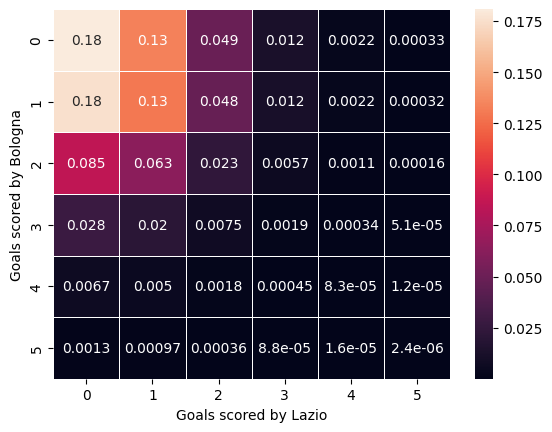

In [ ]:
import seaborn as sns

ax = sns.heatmap(score_matrix, linewidth=0.7, annot=True)
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)

plt.show()

# Calculating Outcomes Probabilities

In [ ]:
#Home, draw, away probabilities
homewin = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
awaywin = np.sum(np.triu(score_matrix, 1))

print(home_team + ' win probability: ' + str(round(homewin*100, 2)) + '%')
print('Draw probability: ' + str(round(draw*100, 2)) + '%')
print(away_team + ' win probability: ' + str(round(awaywin*100, 2)) + '%')

print('---------------------------------------')

round(homewin, 5), round(draw, 5), round(awaywin, 5)

Bologna win probability: 39.67%
Draw probability: 33.58%
Lazio win probability: 26.69%
---------------------------------------


(0.39666, 0.33579, 0.26692)

Avg odds for this match are the following:

* Bologna win probability: 35.76%
* Draw probability: 28.07%
* Lazio win probability: 36.16%


